In [144]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


N=1000
x=np.linspace(0,2*np.pi,N)
sigma=np.sqrt(0.2)
mu=1
x1=x**3
x2=np.sin(x)
noise=np.random.normal(mu,sigma,N)
y=2-x1+3*x2 +noise

df=pd.DataFrame({"x":x,"x1":x1,"x2":x2,"y":y})
display(df)


,x,x1,x2,y
0,0.000000,0.000000e+00,0.000000e+00,4.086187
1,0.006289,2.487959e-07,6.289433e-03,2.524095
2,0.012579,1.990367e-06,1.257862e-02,3.553818
3,0.018868,6.717488e-06,1.886730e-02,2.964396
4,0.025158,1.592293e-05,2.515525e-02,3.030731
...,...,...,...,...
995,6.258027,2.450825e+02,-2.515525e-02,-242.078382
996,6.264317,2.458222e+02,-1.886730e-02,-242.894833
997,6.270606,2.465634e+02,-1.257862e-02,-243.623031
998,6.276896,2.473061e+02,-6.289433e-03,-244.107695


In [145]:
x2 = x**2

train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train = train[["x2"]]
y_train = train["y"] - 2
X_test = test[["x2"]]
y_test = test["y"] - 2

model1 = LinearRegression()
model1.fit(X_train, y_train)

train_pred = model1.predict(X_train)
test_pred = model1.predict(X_test)

MSE_train = mean_squared_error(y_train, train_pred)
RMSE_train = np.sqrt(MSE_train)
NDEI_train = RMSE_train / np.std(y_train)

MSE_test = mean_squared_error(y_test, test_pred)
RMSE_test = np.sqrt(MSE_test)
NDEI_test = RMSE_test / np.std(y_test)

print("MODEL 1 - WITHOUT NORMALIZATION")
print("Train -> MSE:", MSE_train, "RMSE:", RMSE_train, "NDEI:", NDEI_train)
print("Test  -> MSE:", MSE_test,  "RMSE:", RMSE_test,  "NDEI:", NDEI_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model1_scaled = LinearRegression()
model1_scaled.fit(X_train_scaled, y_train)

train_pred_scaled = model1_scaled.predict(X_train_scaled)
test_pred_scaled = model1_scaled.predict(X_test_scaled)

MSE_train_scaled = mean_squared_error(y_train, train_pred_scaled)
RMSE_train_scaled = np.sqrt(MSE_train_scaled)
NDEI_train_scaled = RMSE_train_scaled / np.std(y_train)

MSE_test_scaled = mean_squared_error(y_test, test_pred_scaled)
RMSE_test_scaled = np.sqrt(MSE_test_scaled)
NDEI_test_scaled = RMSE_test_scaled / np.std(y_test)

print("\nMODEL 1 - WITH NORMALIZATION")
print("Train -> MSE:", MSE_train_scaled, "RMSE:", RMSE_train_scaled, "NDEI:", NDEI_train_scaled)
print("Test  -> MSE:", MSE_test_scaled,  "RMSE:", RMSE_test_scaled,  "NDEI:", NDEI_test_scaled)


MODEL 1 - WITHOUT NORMALIZATION
Train -> MSE: 2651.0089437229 RMSE: 51.487949500081086 NDEI: 0.7199212945588072
Test  -> MSE: 2981.26961148042 RMSE: 54.60100375890923 NDEI: 0.7467379608164564

MODEL 1 - WITH NORMALIZATION
Train -> MSE: 2651.0089437229 RMSE: 51.487949500081086 NDEI: 0.7199212945588072
Test  -> MSE: 2981.26961148042 RMSE: 54.60100375890923 NDEI: 0.7467379608164564


In [146]:
x2=np.sin(x)
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train = train[["x2"]]
y_train = train["y"] - 2

X_test = test[["x2"]]
y_test = test["y"] - 2

model1 = LinearRegression()
model1.fit(X_train, y_train)

train_pred = model1.predict(X_train)
test_pred = model1.predict(X_test)

MSE_train = mean_squared_error(y_train, train_pred)
RMSE_train = np.sqrt(MSE_train)
NDEI_train = RMSE_train / np.std(y_train)

MSE_test = mean_squared_error(y_test, test_pred)
RMSE_test = np.sqrt(MSE_test)
NDEI_test = RMSE_test / np.std(y_test)

print("MODEL 1 - WITHOUT NORMALIZATION")
print("Train -> MSE:", MSE_train, "RMSE:", RMSE_train, "NDEI:", NDEI_train)
print("Test  -> MSE:", MSE_test,  "RMSE:", RMSE_test,  "NDEI:", NDEI_test)


MODEL 1 - WITHOUT NORMALIZATION
Train -> MSE: 2651.0089437229 RMSE: 51.487949500081086 NDEI: 0.7199212945588072
Test  -> MSE: 2981.26961148042 RMSE: 54.60100375890923 NDEI: 0.7467379608164564


In [147]:
scaler = StandardScaler()

X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

model1_n = LinearRegression()
model1_n.fit(X_train_n, y_train)

train_pred_n = model1_n.predict(X_train_n)
test_pred_n = model1_n.predict(X_test_n)

MSE_train_n = mean_squared_error(y_train, train_pred_n)
RMSE_train_n = np.sqrt(MSE_train_n)
NDEI_train_n = RMSE_train_n / np.std(y_train)

MSE_test_n = mean_squared_error(y_test, test_pred_n)
RMSE_test_n = np.sqrt(MSE_test_n)
NDEI_test_n = RMSE_test_n / np.std(y_test)

print("\nMODEL 1 - WITH NORMALIZATION")
print("Train -> MSE:", MSE_train_n, "RMSE:", RMSE_train_n, "NDEI:", NDEI_train_n)
print("Test  -> MSE:", MSE_test_n,  "RMSE:", RMSE_test_n,  "NDEI:", NDEI_test_n)



MODEL 1 - WITH NORMALIZATION
Train -> MSE: 2651.0089437229 RMSE: 51.487949500081086 NDEI: 0.7199212945588072
Test  -> MSE: 2981.26961148042 RMSE: 54.60100375890923 NDEI: 0.7467379608164564


In [148]:
x_train_2 = train[["x2","x1"]]
y_train_2 = train["y"]

x_test_2=test[["x2","x1"]]
y_test_2=test["y"]

model_2=LinearRegression(fit_intercept=False)
model_2.fit(x_train_2, y_train_2)
train_pred = model_2.predict(x_train_2)
test_pred = model_2.predict(x_test_2)

MSE_train_2 = mean_squared_error(y_train_2, train_pred)
RMSE_train_2 = np.sqrt(MSE_train_2)
NDEI_train_2 = RMSE_train_2 / np.std(y_train)


MSE_test_2 = mean_squared_error(y_test_2, test_pred)
RMSE_test_2 = np.sqrt(MSE_test_2)
NDEI_test_2 = RMSE_test_2 / np.std(y_test)

print("MODEL 2 - WITHOUT NORMALIZATION/WITH 2 PARAMETERS :")
print("Train -> MSE:", MSE_train_2, "RMSE:", RMSE_train_2, "NDEI:", NDEI_train_2)
print("Test  -> MSE:", MSE_test_2,  "RMSE:", RMSE_test_2,  "NDEI:", NDEI_test_2)

MODEL 2 - WITHOUT NORMALIZATION/WITH 2 PARAMETERS :
Train -> MSE: 3.8142589217371743 RMSE: 1.953012780740867 NDEI: 0.027307661366445492
Test  -> MSE: 3.8449319444515573 RMSE: 1.9608498016042832 NDEI: 0.026817107406718978


In [149]:
scaler=StandardScaler()
x_train_2 = scaler.fit_transform(x_train_2)
x_test_2 = scaler.transform(x_test_2)

model_2_lr=LinearRegression(fit_intercept=False)
model_2_lr.fit(x_train_2, y_train_2)
train_pred = model_2_lr.predict(x_train_2)
test_pred=model_2_lr.predict(x_test_2)
MSE_train_2n = mean_squared_error(y_train_2, train_pred)
RMSE_train_2n = np.sqrt(MSE_train_2)
NDEI_train_2n=RMSE_train_2/np.std(y_train)

MSE_test_2n = mean_squared_error(y_test_2, test_pred)
RMSE_test_2n=np.sqrt(MSE_test_2n)
NDEI_test_2n=RMSE_test_2/np.std(y_test)


print("\nMODEL 2 - WITH NORMALIZATION/ 2 PARAMETERS :")
print("Train -> MSE:", MSE_train_2n, "RMSE:", RMSE_train_2n, "NDEI:", NDEI_train_2n)
print("Test  -> MSE:", MSE_test_2n,  "RMSE:", RMSE_test_2n,  "NDEI:", NDEI_test_2n)




MODEL 2 - WITH NORMALIZATION/ 2 PARAMETERS :
Train -> MSE: 3446.785639981226 RMSE: 1.953012780740867 NDEI: 0.027307661366445492
Test  -> MSE: 3444.101706683993 RMSE: 58.686469536716835 NDEI: 0.026817107406718978


In [150]:
x_train_3 = train[["x1", "x2"]]
y_train_3 = train["y"]
x_test_3 = test[["x1", "x2"]]
y_test_3 = test["y"]

model3=LinearRegression(fit_intercept=True)
model3.fit(x_train_2, y_train_2)

y_train_pred3=model3.predict(x_train_2)
y_test_pred3=model3.predict(x_test_2)

MSE_train3=mean_squared_error(y_train_2, y_train_pred3)
RMSE_train3=np.sqrt(MSE_train3)
NDEI_train3=RMSE_train3 / np.std(y_train)

MSE_test3=mean_squared_error(y_test_2, y_test_pred3)
RMSE_test3=np.sqrt(MSE_test3)
NDEI_test3=RMSE_test3 / np.std(y_test)


print("\nMODEL 3 - WITHOUT NORMALIZATION/ 2 PARAMETERS WITH BIAS:")
print("Train -> MSE:", MSE_train_2, "RMSE:", RMSE_train_2, "NDEI:", NDEI_train_2)
print("Test  -> MSE:", MSE_test_2,  "RMSE:", RMSE_test_2,  "NDEI:", NDEI_test_2)



MODEL 3 - WITHOUT NORMALIZATION/ 2 PARAMETERS WITH BIAS:
Train -> MSE: 3.8142589217371743 RMSE: 1.953012780740867 NDEI: 0.027307661366445492
Test  -> MSE: 3.8449319444515573 RMSE: 1.9608498016042832 NDEI: 0.026817107406718978


In [151]:

model3_scaler=StandardScaler()
x_train_3=scaler.fit_transform(x_train_2)
x_test_3=scaler.transform(x_test_2)

model3=LinearRegression(fit_intercept=True)
model3.fit(x_train_3, y_train_2)

y_train_pred3=model3.predict(x_train_3)
y_test_pred3=model3.predict(x_test_3)

MSE_train3=mean_squared_error(y_train_3, y_train_pred3)
RMSE_train3=np.sqrt(MSE_train3)
NDEI_train3=RMSE_train3 / np.std(y_train)

MSE_test3=mean_squared_error(y_test_3, y_test_pred3)
RMSE_test3=np.sqrt(MSE_test3)
NDEI_test3=RMSE_test3 / np.std(y_test)


print("\nMODEL 3 - WITH NORMALIZATION/ 2 PARAMETERS WITH BIAS:")
print("Train -> MSE:", MSE_train_2, "RMSE:", RMSE_train_2, "NDEI:", NDEI_train_2)
print("Test  -> MSE:", MSE_test_2,  "RMSE:", RMSE_test_2,  "NDEI:", NDEI_test_2)



MODEL 3 - WITH NORMALIZATION/ 2 PARAMETERS WITH BIAS:
Train -> MSE: 3.8142589217371743 RMSE: 1.953012780740867 NDEI: 0.027307661366445492
Test  -> MSE: 3.8449319444515573 RMSE: 1.9608498016042832 NDEI: 0.026817107406718978


In [152]:
noise_settings = [
    (0, 0.1),
    (1, 0.2),
    (1, 1.0),
    (2, 2.0),
    (-1, 0.5)
]

print("Effect of Noise on Model 3 (with bias)\n")

for mu, sigma2 in noise_settings:

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    MSE = mean_squared_error(y_test_3, y_pred)
    RMSE = np.sqrt(MSE)
    NDEI = RMSE / np.std(y_test)
    print(f"mu={mu:} , sigma^2={sigma2:}  :  RMSE={RMSE:} , NDEI={NDEI:}")


Effect of Noise on Model 3 (with bias)

mu=0 , sigma^2=0.1  :  RMSE=54.551878384770326 , NDEI=0.746066109033826
mu=1 , sigma^2=0.2  :  RMSE=54.551878384770326 , NDEI=0.746066109033826
mu=1 , sigma^2=1.0  :  RMSE=54.551878384770326 , NDEI=0.746066109033826
mu=2 , sigma^2=2.0  :  RMSE=54.551878384770326 , NDEI=0.746066109033826
mu=-1 , sigma^2=0.5  :  RMSE=54.551878384770326 , NDEI=0.746066109033826


question 2:

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [154]:
df = pd.read_csv(r"C:\Users\Elahe\Downloads\diabetic_data.csv")


print(df.shape)
df.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [155]:
df.replace('?', np.nan, inplace=True)


missing_ratio = df.isna().mean().sort_values(ascending=False)
display(missing_ratio)

weight                      0.968585
max_glu_serum               0.947468
A1Cresult                   0.832773
medical_specialty           0.490822
payer_code                  0.395574
race                        0.022336
diag_3                      0.013983
diag_2                      0.003518
diag_1                      0.000206
patient_nbr                 0.000000
time_in_hospital            0.000000
admission_source_id         0.000000
num_lab_procedures          0.000000
encounter_id                0.000000
admission_type_id           0.000000
discharge_disposition_id    0.000000
gender                      0.000000
age                         0.000000
number_inpatient            0.000000
number_emergency            0.000000
number_outpatient           0.000000
num_medications             0.000000
num_procedures              0.000000
number_diagnoses            0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
c

In [156]:
cols_to_drop = missing_ratio[missing_ratio > 0.4].index
df.drop(columns=cols_to_drop, inplace=True)
cols_to_drop


Index(['weight', 'max_glu_serum', 'A1Cresult', 'medical_specialty'], dtype='object')

In [157]:
df.dropna(inplace=True)
print(df.shape)

(59129, 46)


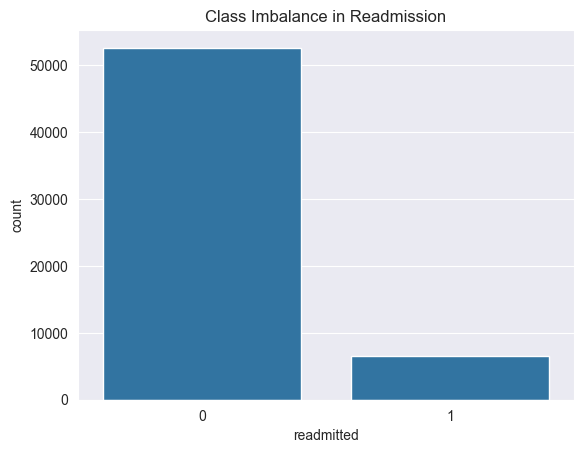

In [158]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

sns.countplot(x='readmitted', data=df)
plt.title('Class Imbalance in Readmission')
plt.show()

In [159]:
categorical_cols = df.select_dtypes(include='object').columns


le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [160]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, stratify=y, random_state=42
)

In [161]:
rf_100 = RandomForestClassifier(
n_estimators=200,
max_leaf_nodes=100,
class_weight='balanced',
random_state=42
)


rf_100.fit(X_train, y_train)
y_pred_100 = rf_100.predict(X_test)


print(classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82     10523
           1       0.19      0.49      0.27      1303

    accuracy                           0.71     11826
   macro avg       0.55      0.61      0.54     11826
weighted avg       0.84      0.71      0.76     11826



In [162]:
rf_300 = RandomForestClassifier(
n_estimators=200,
max_leaf_nodes=300,
class_weight='balanced',
random_state=42
)


rf_300.fit(X_train, y_train)
y_pred_300 = rf_300.predict(X_test)


print(classification_report(y_test, y_pred_300))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     10523
           1       0.21      0.40      0.27      1303

    accuracy                           0.76     11826
   macro avg       0.56      0.60      0.57     11826
weighted avg       0.84      0.76      0.79     11826



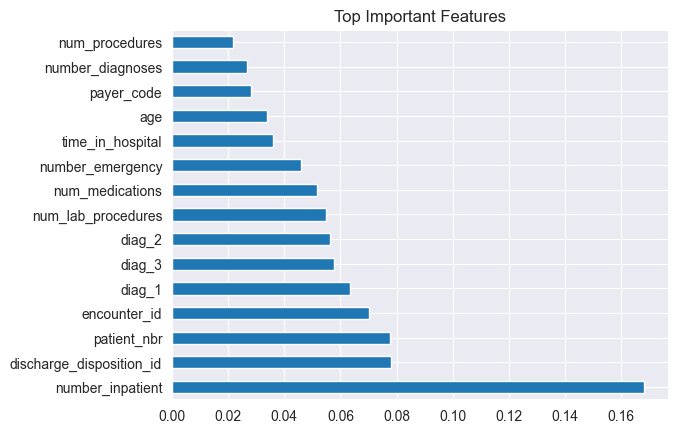

In [163]:
importances = pd.Series(rf_300.feature_importances_, index=X.columns)
important_features = importances.sort_values(ascending=False).head(15)


important_features.plot(kind='barh', title='Top Important Features')
plt.show()

In [164]:
selector = SelectFromModel(rf_300, threshold='median')
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

In [165]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
n_estimators=300,
max_depth=6,
learning_rate=0.05,
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum(),
eval_metric='logloss'
)


xgb.fit(X_train_sel, y_train)
y_pred_xgb = xgb.predict(X_test_sel)


print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82     10523
           1       0.18      0.47      0.26      1303

    accuracy                           0.71     11826
   macro avg       0.55      0.61      0.54     11826
weighted avg       0.84      0.71      0.76     11826



In [166]:
roc_auc_score(y_test, rf_300.predict_proba(X_test)[:,1])
roc_auc_score(y_test, xgb.predict_proba(X_test_sel)[:,1])

0.659160152715949